In [19]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [20]:
# Read the data
data = pd.read_csv("/content/Continuous_Pathway_I_VAE_dataset1.csv")
# seperate target
data_target = data['Product_I']
# seperate features
data = data.drop('Product_I', axis=1)
data_features = data.drop('Unnamed: 0', axis=1)
print('shape of features data: ', data_features.shape)
# get values in np array
data_feat = data_features.values

shape of features data:  (5000, 19)


In [21]:
n_components = 19

In [22]:
std_scaler = StandardScaler()
scaled_df = std_scaler.fit_transform(data_features.T)

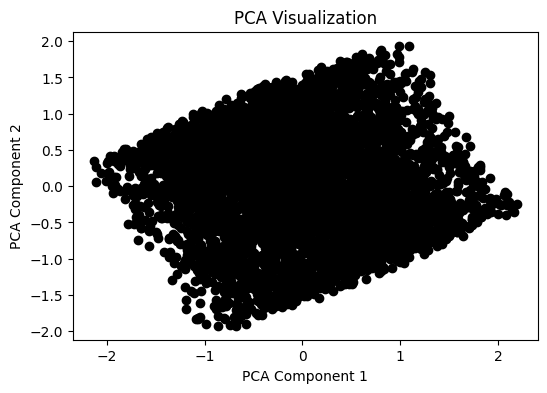

In [23]:
# Train the model
pca = PCA(n_components=n_components)
pca.fit(data_features)
reduced_data = pca.transform(data_features)

feature_1 = 0
feature_2 = 1

plt.figure(figsize=(6,4))
plt.scatter(reduced_data[:,feature_1], reduced_data[:,feature_2], color='black')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization')


plt.show()

([<matplotlib.axis.XTick at 0x79ea8a595900>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18')])

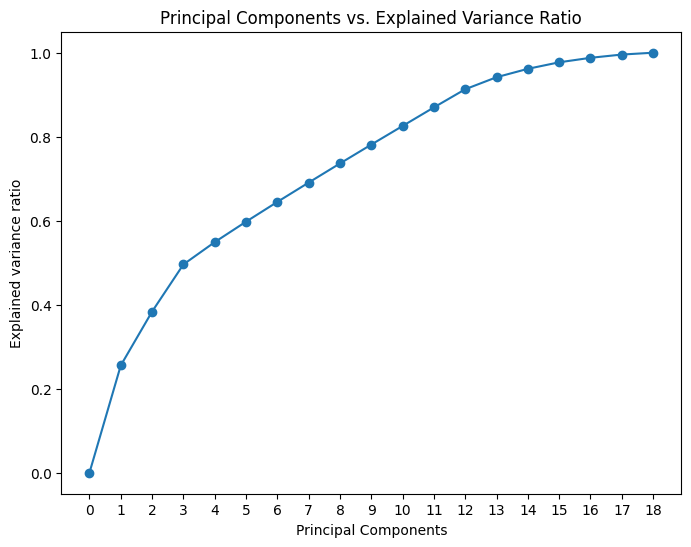

In [24]:
nums = np.arange(19)
var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(scaled_df)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(8,6),dpi=100)
plt.plot(nums, var_ratio,marker='o')
plt.xlabel('Principal Components')
plt.ylabel('Explained variance ratio')
plt.title('Principal Components vs. Explained Variance Ratio')
plt.xticks(nums)

# This implementation can be found and further explained here: https://www.kdnuggets.com/2023/05/principal-component-analysis-pca-scikitlearn.html